In [1]:
from sklearn.datasets import load_boston
boston = load_boston()
import matplotlib.pyplot as plt

In [2]:
print(boston.data.shape)

(506, 13)


In [3]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [4]:
print(boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [5]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [6]:
import pandas as pd
bos = pd.DataFrame(boston.data)
print(bos.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [7]:
bos['PRICE'] = boston.target

X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 5)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


In [9]:
# Standardizing the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

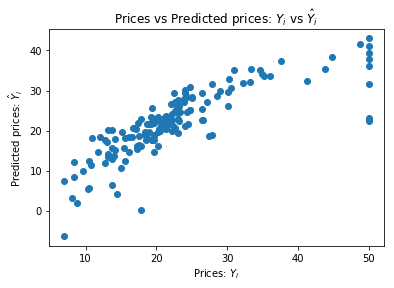

In [10]:
# code source:https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [11]:
from sklearn.metrics import mean_squared_error
import seaborn as sns;
import numpy as np;


mse = (mean_squared_error(Y_test, Y_pred))
print('ROOT Mean Squared Error of linear regression',np.sqrt(mse))

ROOT Mean Squared Error of linear regression 5.541049738742553


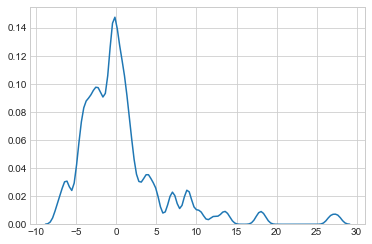

In [12]:
delta_y = Y_test - Y_pred;

import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()


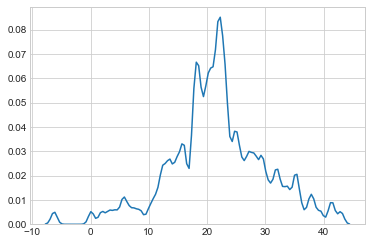

In [13]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(Y_pred), bw=0.5)
plt.show()

### Defining the SGD Linear Algorithm

In [15]:
X.shape

(506, 13)

In [40]:
X_train.shape

(354, 13)

In [57]:
def dL_dW(X,e,N):
    x11= (-2/N)*(X.T @ (e))
    # for derivative functn w.r.t to 'w' we are taking the dot product (using @) of transpose of traning data X and error e 
    return x11
def dL_db(e,N):
    return (-2/N)*np.sum(e)
    # for derivative functn w.r.t to 'b' we are takinh summation of error e
def gradient_descent(learning_rate ,ierations):
    '''
    We are defining the SGD fuctn here for each of the training data in X.
    the error is calculated and funtn is is updated in order to reduce the error for the next prediction. 
    This process is repeated for a fixed number of iterations, the learning rate defines how fast the function moves to optimal mimnima
    '''
    N = len(X_train)
    w1 = np.random.rand(1,(X_train.shape[1]))
    b1 = np.random.rand()
    optimal_w = []
    optimal_b = []
    for j in range (ierations):
        # getting the error e , which returns me a vector of (354,1)
        e = (Y_train[:,np.newaxis] - (X_train @ w1.T) - b1)
        # getting the w1 , which returns me a vector of (1,13)
        w1 = (w1) - (learning_rate*(dL_dW(X_train,e,N))).T
        b1 = (b1) - (learning_rate*dL_db(e,N))
    return w1,b1

In [81]:
w,b = gradient_descent(learning_rate = 0.1,ierations =10000)
w,b

(array([[-1.26415881,  0.94329906, -0.16687636,  0.18653568, -1.49252028,
          2.79557313, -0.29648219, -2.72594888,  2.76899352, -2.1378414 ,
         -2.09193889,  1.16450017, -3.29650834]]), 22.556214689265538)

In [70]:
o= w.T
o.shape

(13, 1)

ROOT Mean Squared Error 5.541049688511123


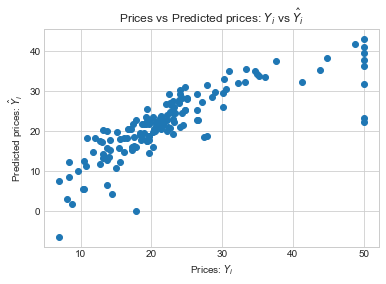

In [37]:
from sklearn.metrics import mean_squared_error

Y_pred_sgd = (X_test @ (o))+(b)
mse = (mean_squared_error(Y_test, Y_pred_sgd))
print('ROOT Mean Squared Error',np.sqrt(mse))
plt.scatter(Y_test, Y_pred_sgd)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [84]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Method", "Metric to compare"]

x.add_row(["Linaer Regrssion Function", 'ROOT Mean Squared Error is 5.541049738742553'])
x.add_row(["SGD Function", 'ROOT Mean Squared Error is 5.541049688511123'])

print(x)

+---------------------------+----------------------------------------------+
|           Method          |              Metric to compare               |
+---------------------------+----------------------------------------------+
| Linaer Regrssion Function | ROOT Mean Squared Error is 5.541049738742553 |
|        SGD Function       | ROOT Mean Squared Error is 5.541049688511123 |
+---------------------------+----------------------------------------------+
